In [9]:
import numpy as np
import torch 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import time
import sys
import itertools

import pandas as pd

In [10]:
names = {"narea": "Narea", "sla": "SLA", "ps": "PLSR_SLA_Sorghum", "pn": "FS_PLSR_Narea"}

In [11]:
coh_avg_time = 0.196766
seeds = 5
for acq_name in ["PI", "EI", "UCB"]:
    for kernel_name in ["matern52", "matern32", "rbf", "matern12"]:
        for trait in ["narea"]:
            trait = trait.lower()
            #organize timed data into one file
            #_results = [pd.read_csv(f"{base_path}/runs/{trait}/TimeTest/botorchEInew_result_{seed}.npy", encoding='utf-8') for seed in range(seeds)]
            _results = [pd.read_csv(f"./output/{trait}/botorch{acq_name}_{kernel_name}_result_{seed}.npy", encoding='utf-8') for seed in range(seeds)]
            print(f"./output/{trait}/botorch{acq_name}_{kernel_name}_result_x.npy")
            
            _results = pd.concat(_results, ignore_index=False)

            #add time needed calculate co-heritability (using LMER model)
            _results['Time'] = _results.apply(lambda row : row['Time'] + coh_avg_time * row.name, axis=1) #add lookup time

            #THIS VERSION OF THE RESULTS HAVE LOOKUP TIMES ADDED TO IT
            _results = _results.sort_values('Time')
            #_results.to_csv(f"{base_path}/runs/{trait}/TimeTest/botorchEInew_time.npy", encoding='utf-8') #store botorch search results
            #_results.to_csv(f"./output/{trait}/botorch{acq_name}_{kernel_name}new_time.npy", encoding='utf-8') #store botorch search results

./output/narea/botorchPI_matern52_result_x.npy
./output/narea/botorchPI_matern32_result_x.npy
./output/narea/botorchPI_rbf_result_x.npy
./output/narea/botorchPI_matern12_result_x.npy
./output/narea/botorchEI_matern52_result_x.npy
./output/narea/botorchEI_matern32_result_x.npy
./output/narea/botorchEI_rbf_result_x.npy
./output/narea/botorchEI_matern12_result_x.npy
./output/narea/botorchUCB_matern52_result_x.npy
./output/narea/botorchUCB_matern32_result_x.npy
./output/narea/botorchUCB_rbf_result_x.npy
./output/narea/botorchUCB_matern12_result_x.npy


/dfs/scratch0/ruhana/miniconda3/envs/genCorSearch/lib/python3.10/site-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


ValueError: operands could not be broadcast together with shapes (100,) (2,) 

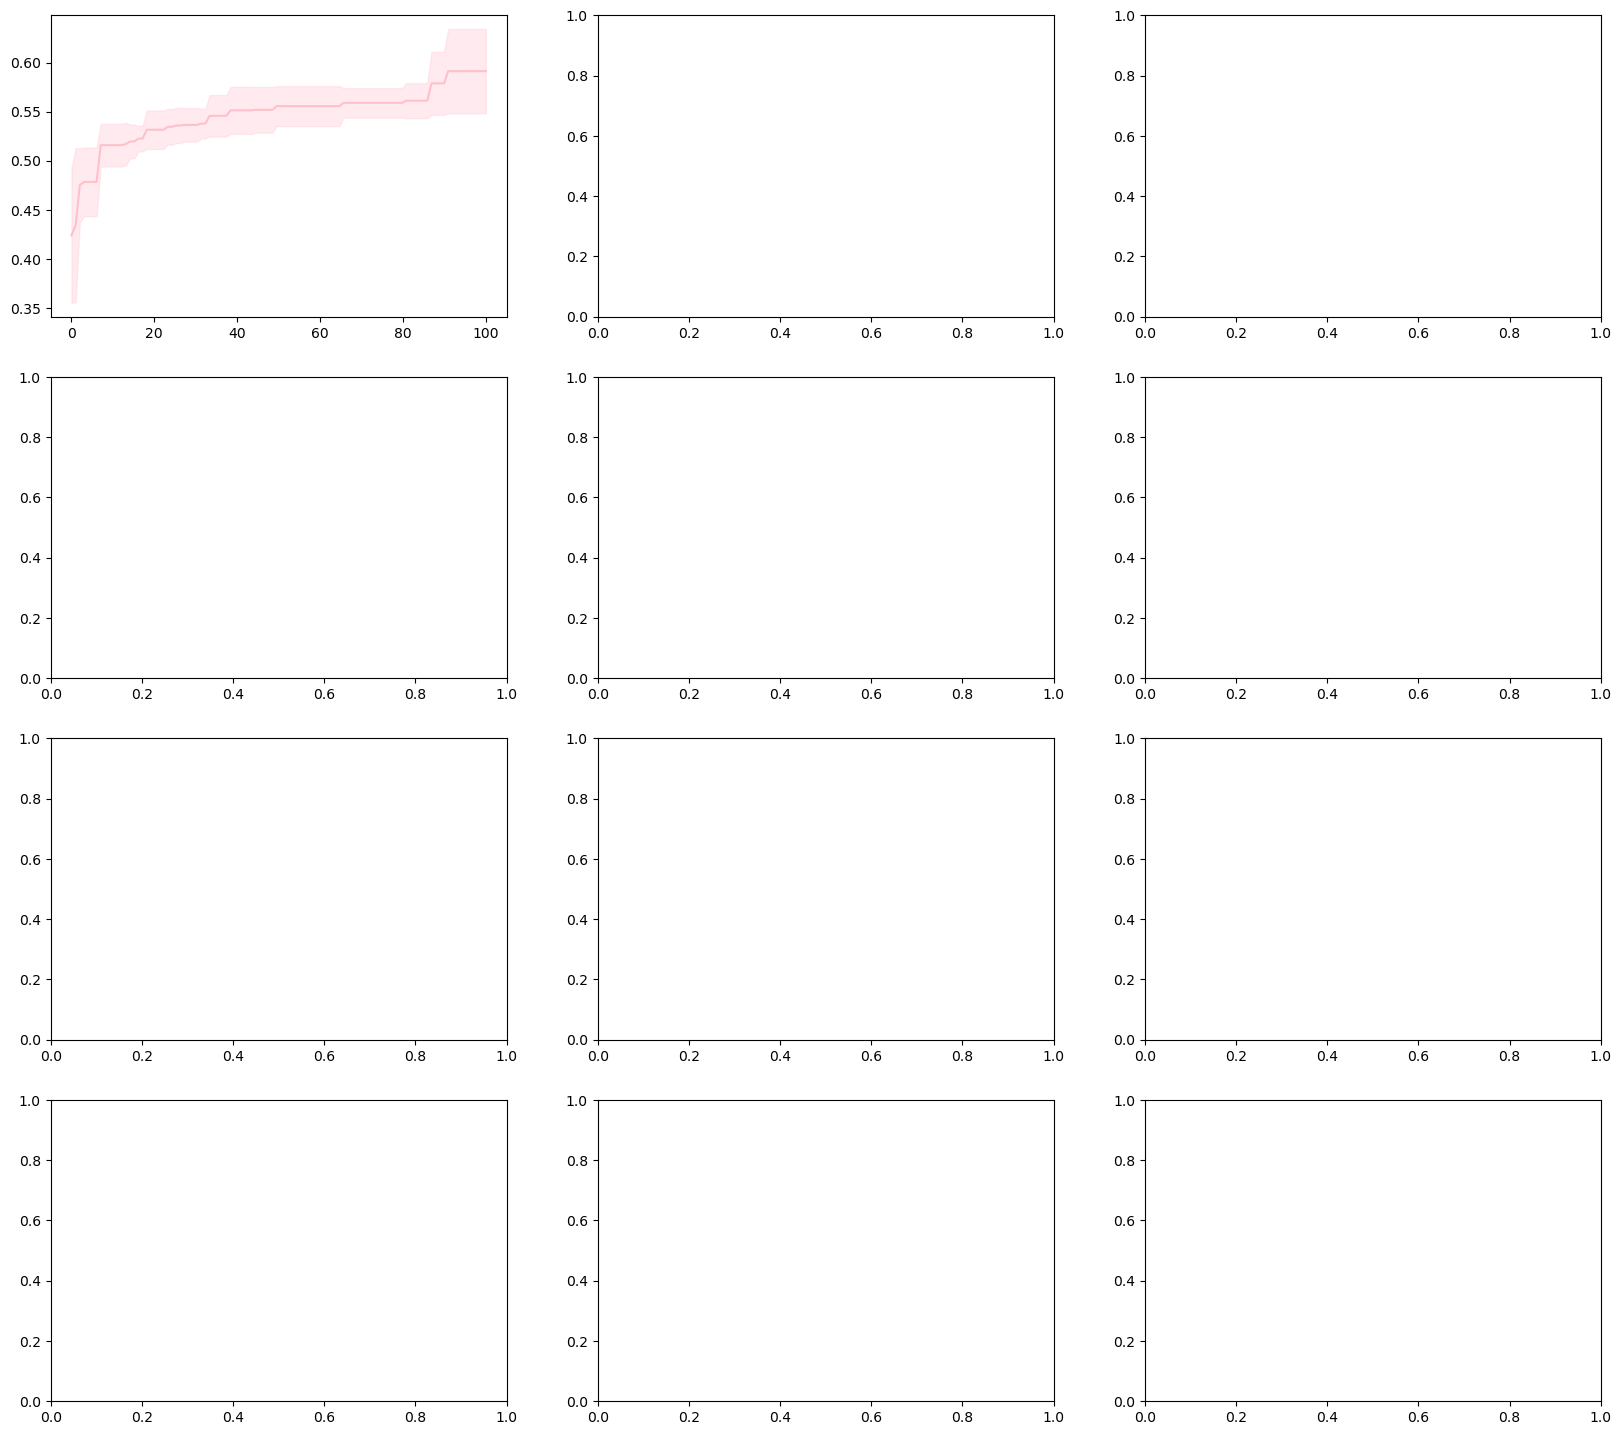

In [12]:
trait = "narea"
alpha = 0.2

#its = 300 #current maximum iterations i have ran....
#x = np.linspace(0, its, its)

kernels = ["matern52", "matern32", "matern12", "rbf"]
acqs = ["EI", "PI", "UCB"]

fig, axs = plt.subplots(len(kernels), len(acqs), figsize=(20, 18))
color_dict = {"EI": 'Pink', "PI": 'Blue', "KG": 'Green', "UCB": 'Orange'}

#BAYESIAN OPTIMIZATION
for k, kernel_name in enumerate(kernels):
    for a, acq_name in enumerate(acqs):
        botorch_results = [pd.read_csv(f"./output/{trait}/botorch{acq_name}_{kernel_name}_result_{seed}.npy", encoding='utf-8')["Best"] for seed in [0,1,2,3,4]]
        botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
        mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
        x_axis = np.linspace(0, len(mean), len(mean))

        color = color_dict[acq_name]
        axs[k, a].plot(x_axis, mean, label= f"BO-{acq_name}-{kernel_name}", color=color)
        axs[k, a].fill_between(x_axis, mean - var,  mean + var, alpha=0.3, color=color)
    
        #plot random
        botorch_results = [pd.read_csv(f"./output/{trait}/botorchrandom_result_{seed}.npy", encoding='utf-8')["Best"] for seed in [0,1,2,3,4]]
        botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
        mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
        axs[k, a].plot(x_axis, mean, label= f"random", color="black")
        axs[k, a].fill_between(x_axis, mean - var,  mean + var, alpha=0.3, color="black")

        # #graph elements
        # plt.plot([actual_max[trait]]*its ,linestyle='dashed', label="Best Co-heritabilty")
        # plt.plot ([top_01[trait]]*its ,linestyle='dashed', label="Top 1%")

        axs[k, a].set_title(f"Wavelength Ratio + {trait}, {kernel_name}", fontsize=12)
        axs[k, a].set_xlabel("Iterations (n)", fontsize=10)
        axs[k, a].set_ylabel("Max Co-Heritability", fontsize=10)
        axs[k, a].legend(loc="lower right", fontsize=11)